# Sorting

In this assignment, we will look at some sorting algorithms. Here we want to sort a list of elements based on their keys. Each element is represented as a pair $(k, v)$ where $k$ stands for the key and $v$ stands for the value. The final output should have the same elements as the input, but sorted in the increasing order of keys.

## Python Tuples

Python tuples are similar to lists. The key difference is that tuples are immutable. The basic usage is illustrated below:

In [1]:
a = (11, 21, 13)
print(a[0], a[1], a[2])

11 21 13


## Helper Functions

The following blocks are functions useful for testing your code. Please just run these blocks without any change.

In [2]:
import random as rnd

In [3]:
# Do NOT modify this cell!

# Helper functions

def toss_coin(p=0.5):
    r = rnd.random()
    if r <= p:
        return True
    else:
        return False


def get_random_list(max_length=1000, min_length=0, key_start=0):
    n = rnd.randint(min_length, max_length)
    
    values = list( range(n) )
    rnd.shuffle( values )
    
    rls = []
    
    i = 0
    while True:
        # Toss a fair coin and decide whether to include this key or not.
        if toss_coin():
            rls.append( (key_start, values[i]) )
            i += 1
            
            if i >= n:
                break
        
        # Again toss a biased coin (p=0.9) to decide whether to increment the key.
        if toss_coin(0.8):
            key_start += 1
            
    rls2 = rls[:]
    rnd.shuffle(rls2)
    return rls2, rls
    
    
def test_sort(sort_fn = None):
    a = []
    sort_fn(a)
    assert a==[]

    for i in range(10):
        a, asorted = get_random_list(max_length=20, min_length=5, key_start=-10)
        sort_fn(a)
        assert [x[0] for x in a] == [x[0] for x in asorted]
    

    for i in range(5):
        a, asorted = get_random_list(max_length=1000, min_length=100, key_start=-100)
        sort_fn(a)
        assert [x[0] for x in a] == [x[0] for x in asorted]
        
    print("Everything works!")
    

In [4]:
get_random_list(5,5)[0]

[(1, 0), (0, 1), (2, 2), (2, 3), (3, 4)]

## Selection Sort

Selection sort sorts by repeatedly finding the minimum of sublists. In the iteration $i$, the minimum of elements from indices $i$, $i+1$, ... is found. This minimum is put in the index $i$. So in the 0th iteration, the minimum of the whole list (indices $0$, $1$, ... ) is found and placed in the 0th position. In the 1st iteration, the minimum of the list excluding the first element (indices $1$, $2$, ... ) is found and put in the 1st position, and so on.

In [5]:
def find_min(alist, start_idx=0):
    # Return the index of the smallest element from the list alist[start_idx, start_idx+1, ....]
    # Note that our list consists of tuples.
    
    # Your Code here.
    nlist=[]
   
    nlist=alist[start_idx:]
    #print(nlist)
    m=min(nlist)
    #print(m)
   
    ind_min= alist.index(m)
    
    #print(ind_min)

    return ind_min # return the index in the original list, not the tuple/value.

def selection_sort(alist):
    
    for i in range(len(alist)):
        idx = find_min(alist, i)
                
        # Now we swap the element at index idx with the index i
        alist[i], alist[idx] = alist[idx], alist[i]
        
    return alist
    

In [6]:
# Do NOT modify this cell!

# Test suit

test_sort(sort_fn = selection_sort)

Everything works!


## Insertion Sort

In insertion sort, we maintain a sorted list of the elements we have seen so far. That is, once iteration $i$ is over, we can be sure that elements at indices $0$, $1$, $2$, ... $i$ are in sorted order. Now when we see the $\text{alist}[i+1]$, we insert the element to the correct position so that all elements at indices $0$, $1$, ... $i$, $i+1$ are in sorted order. We continue this process until we get the sorted list. 

In [16]:
def insertion_sort(alist):
    
    for i, kv in enumerate(alist):
        #print(alist)
        # Our assumption: alist[0], alist[1], ... alist[i-1] are already sorted.
        # Now insert the element alist[i] at the proper place and shift the tuples with keys which 
        # are greater than alist[i].
        #print(i,kv)
        for j in range(i-1, -1, -1):
            #print(alist[j][0])
            #print(kv[0])
            #print(alist[j])
            # If alist[j][0] is greater than kv[0], copy alist[j][0] to alist[j+1][0]
            # Otherwise, break out of the loop.
            # Your CODE here
            
            if (alist[j][0]>kv[0]):
                alist[j+1]=alist[j]
            else:
                break
            alist[j]=kv
             

            
        # Now we know where to copy kv
        # Copy kv to that index.
        # Your CODE here
            
      
   # return alist # Not really needed since we are sorting in place.
        

In [17]:
# Do NOT modify this cell!

# Test suit

test_sort(sort_fn = insertion_sort)

Everything works!


## Merge Sort

In Merge Sort, we break the list to be sorted into two. Then we sort the two lists independently and then merge the two half lists to obtain the final sorted list.

In [18]:
def merge(ahalf_list1, ahalf_list2, alist):
    # Given two sorted lists ahalf_list1 and ahalf_list2,
    # produce the final sorted list in alist[0, 1, ...]
    #print(1,ahalf_list1)
    #print(2,ahalf_list2)
    # YOUR CODE HERE
    i=0
    j=0
    k=0
    len1=len(ahalf_list1)
    len2=len(ahalf_list2)
    #print(len1)
    #print(ahalf_list1[i][0])
    #sorted_list=[]
    while(i<len1)and(j<len2):
        if(ahalf_list1[i][0]<ahalf_list2[j][0]):
            alist[k]=ahalf_list1[i]
            i=i+1
        else:
            alist[k]=ahalf_list2[j]
            j=j+1
        k=k+1
    while i < len1:
        alist[k] = ahalf_list1[i]
        i = i + 1
        k = k + 1

    while j < len2:
        alist[k] = ahalf_list2[j]
        j = j + 1
        k = k + 1
        
    
    return alist
 

def merge_sort(alist):
    n = len(alist)
    #print(alist)
    #print(n)
    if n < 2:
        # No need to sort
        return alist
    
    half_idx = n//2
    
    ahalf_list1 = alist[0:half_idx]
    ahalf_list2 = alist[half_idx : n]
    
    merge_sort(ahalf_list1)
    merge_sort(ahalf_list2)
    
    merge(ahalf_list1, ahalf_list2, alist)
    #print(alist)
    return alist

In [19]:
# Do NOT modify this cell!

# Test suit

test_sort(sort_fn = merge_sort)

Everything works!


## Extra Credit: Evaluating the Runtime

The following code evaluates the time taken by the various sorts for different sized inputs.

In [20]:
import time

def measure_time_sortn(sort_fn, n, count):
    total_time = 0
    for i in range(count):
        to_sort = get_random_list(n, n)[0]
        start = time.process_time()
        sort_fn(to_sort)
        total_time += time.process_time() - start
    return total_time / count


def measure_time_sort(sort_fn, ns, count=5):
    ys = []
    
    for n in ns:
        ys.append( measure_time_sortn(sort_fn, n, count))
    return ys
    

In [21]:
# Let us evaluate the three sorting functions

ns = [n for n in range(10, 1000, 10)]

ys_ss = measure_time_sort(selection_sort, ns)
ys_is = measure_time_sort(insertion_sort, ns)
ys_ms = measure_time_sort(merge_sort, ns)


Now plot $\text{ys_ss}$, $\text{ys_is}$ and $\text{ys_ms}$ against $\text{ns}$ using matplotlib.

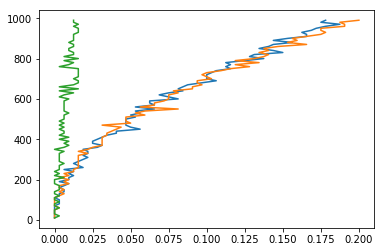

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Your CODE here:
plt.plot(ys_ss,ns)
plt.plot(ys_is,ns)
plt.plot(ys_ms,ns)

